In [20]:
# collisionData plot
import numpy as np

In [21]:
#Data = np.load(r'C:\Users\xumw1\Documents\GitHub\robotPathPlanning\logs\CollisionData.npy')
Data = np.load('logs/CollisionData.npy')
Data.shape

(15625, 17)

Data = np.hstack((config, y.reshape(-1,1),EEPosition,EEOrientation,EEQuaternion))

In [22]:
config, y, EEPosition, EEOrientation, EEQuaternion = Data[:,:6], Data[:,6], Data[:,7:10], Data[:,10:13], Data[:,13:17]

<IPython.core.display.Javascript object>


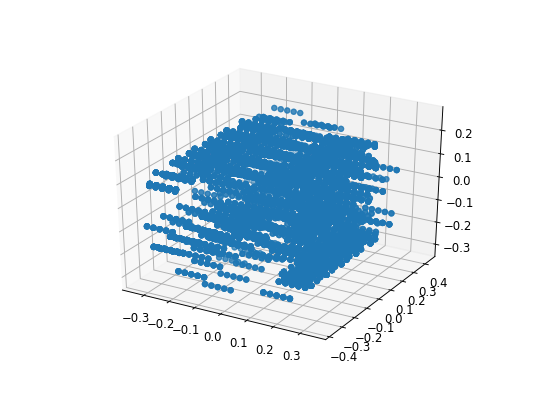

In [23]:
# plot all points
#%matplotlib inline
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(-EEPosition[:,1], EEPosition[:,2], -EEPosition[:,0])
plt.show()

[[ 4.76837158e-07  4.99997139e-02 -2.98023224e-07]
 [ 4.76837158e-07  4.99997139e-02 -2.98023224e-07]
 [-1.04520559e-01  2.92974234e-01 -3.64218950e-01]
 ...
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]]


<IPython.core.display.Javascript object>


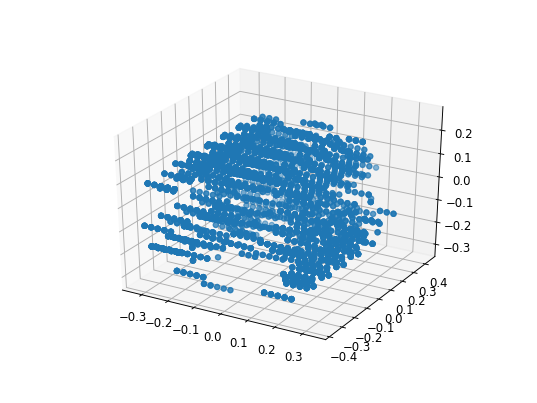

In [7]:
# plot points in C-free
EEPosition_free = EEPosition[y==0,:]
print(EEPosition_free)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(-EEPosition_free[:,1], EEPosition_free[:,2], -EEPosition_free[:,0])
plt.show()

In [24]:
# C-free point quaternion
EEQuaternion_free = EEQuaternion[y==0,:]
print(EEQuaternion_free)

[[-4.47034836e-08  0.00000000e+00  2.98023224e-08  1.00000000e+00]
 [-4.47034836e-08  0.00000000e+00  2.98023224e-08  1.00000000e+00]
 [-2.04635382e-01 -8.04544091e-01 -3.94229203e-01  3.94229084e-01]
 ...
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]]


In [25]:
# insertion of C-free points
from transforms3d import quaternions
total_config = EEPosition_free.shape[0]

new_config = 20   # !!! setup insertion linspace numbers here
EEPosition_new  = np.zeros((total_config*new_config, 3))
EEQuaternion_new  = np.zeros((total_config*new_config, 4))

count = 0
for i in range(total_config):
    quat = EEQuaternion_free[i,:]
    pos = np.matrix(EEPosition[i,:]).T
    #quat = quaternions.qinverse(quat)
    # inverse transformation matrix
    M = quaternions.quat2mat(quat)
    M = M.T
    
    offset = np.linspace(0,0.5,new_config)
    
    for j in range(new_config):
        insertion = np.array([[0],[0],[offset[j]]])
        
        # inverse transformation matrix
        insertion = -np.matmul(M,insertion)
        
        homo = np.array([0,0,0,1])
        T = np.hstack((M, insertion))
        T = np.vstack((T,homo))
        #print(insertion)
        #print(T)

        h_pos_new = T*np.vstack((pos,1))
        #print(h_pos_new)
        pos_new = np.asarray(h_pos_new[:3]).reshape(-1)
        EEPosition_new[count,:] = pos_new
        EEQuaternion_new[count,:] = quat
        count += 1
    #print(pos_new)
print(EEPosition_new)

[[-4.81307481e-07 -4.99997139e-02 -2.95043009e-07]
 [-4.81307481e-07 -4.99997155e-02 -2.63160845e-02]
 [-4.81307481e-07 -4.99997170e-02 -5.26318740e-02]
 ...
 [-1.12584233e-01  4.42564189e-02 -5.73392101e-01]
 [-1.12584233e-01  4.42564189e-02 -5.99707890e-01]
 [-1.12584233e-01  4.42564189e-02 -6.26023680e-01]]


<IPython.core.display.Javascript object>


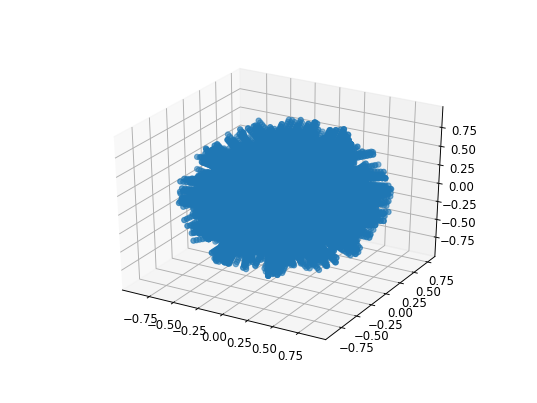

In [26]:
# plot new points
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(-EEPosition_new[:,1], EEPosition_new[:,2], -EEPosition_new[:,0])
plt.show()

In [27]:
EEPosition.shape

(15625, 3)

In [11]:
# set surface size
xmin = ymin = -0.2
xmax = ymax = 0.2

In [28]:
inplane_x = np.logical_and((-EEPosition_new[:,1]>xmin), (-EEPosition_new[:,1]<xmax))
inplane_y = np.logical_and((EEPosition_new[:,2]>ymin), (EEPosition_new[:,2]<ymax))
inplane_z = np.logical_and((-EEPosition_new[:,0]>-0.4), (-EEPosition_new[:,0]<-0.25))   # thick of Z-slice

In [29]:
# get points in plane
inplane_xy = np.logical_and(inplane_x, inplane_y)
inplane_xyz = np.logical_and(inplane_xy, inplane_z)
print(inplane_xyz)

EEPosition_new_inplane = EEPosition_new[inplane_xyz]
EEQuaternion_new_inplane = EEQuaternion_new[inplane_xyz]

[False False False ... False False False]


<IPython.core.display.Javascript object>


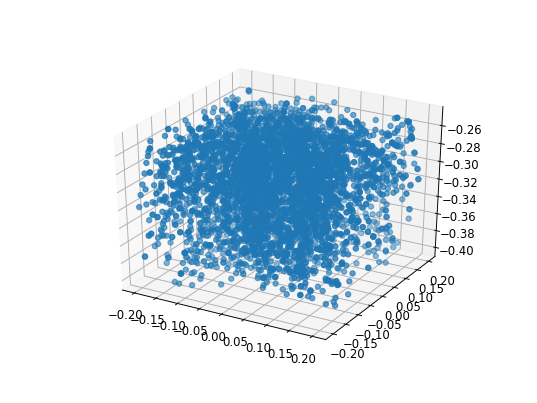

In [30]:
# plot inplane points
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(-EEPosition_new_inplane[:,1], EEPosition_new_inplane[:,2], -EEPosition_new_inplane[:,0])
plt.show()

In [31]:
print(EEQuaternion_new_inplane.shape)
print(EEPosition_new_inplane.shape)

(4279, 4)
(4279, 3)


<IPython.core.display.Javascript object>


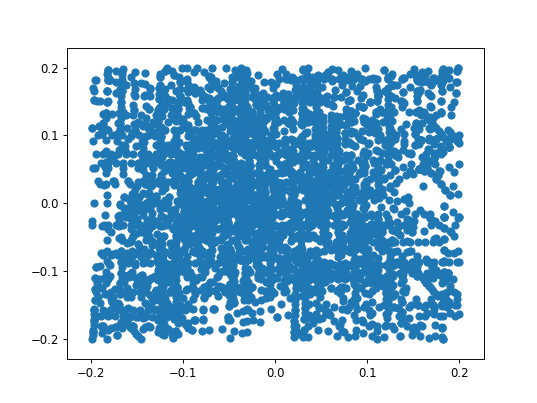

In [32]:
# plot plane
x_inplane = -EEPosition_new_inplane[:,1]
y_inplane = EEPosition_new_inplane[:,2]
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x_inplane, y_inplane)
plt.show()

In [17]:
data = np.array([x_inplane,y_inplane])

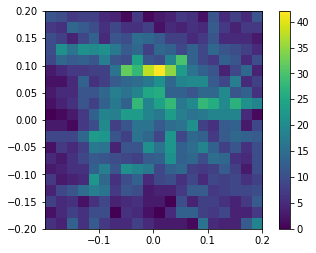

In [33]:
#hisat = np.histogramdd(data.T,bins=[5,5],density=True)
%matplotlib inline
hist, xedges, yedges = np.histogram2d(x_inplane, y_inplane, bins=20)
plt.imshow(hist, extent=(np.amin(x_inplane), np.amax(x_inplane), np.amin(y_inplane), np.amax(y_inplane)))
plt.colorbar()
plt.show()

In [34]:
# 3D histogram doesn't work
# xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25)
# xpos = xpos.flatten('F')
# ypos = ypos.flatten('F')
# zpos = np.zeros_like(xpos)

# # Construct arrays with the dimensions for the 16 bars.
# dx = 0.5 * np.ones_like(zpos)
# dy = dx.copy()
# dz = hist.flatten()

# ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color='b', zsort='average')

# plt.show()

In [37]:
# discretelize
plane_res = 0.01
xis = np.ceil((x_inplane - xmin) / plane_res).astype(np.int16)-1
yis = np.ceil((y_inplane - ymin) / plane_res).astype(np.int16)-1
print(xis)
print(yis)

[39 39 39 ... 28 30 31]
[36 37 39 ... 22 22 22]


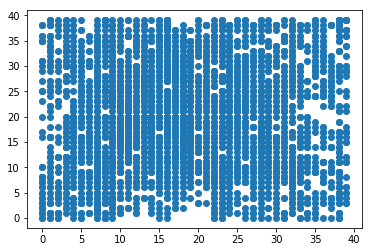

In [38]:
# plot discrete
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(xis, yis,cmap="hot")
plt.show()